<a href="https://colab.research.google.com/github/guilhermelaviola/SoccerCompetitionsStudy/blob/main/UELStudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing all the necessary libraries:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, FFMpegWriter
import seaborn as sns

In [2]:
# Importing the dataset:
uefa_competitions = pd.ExcelFile('UEFA Competitions finals.xlsx')
uel = pd.read_excel(uefa_competitions, 'UEFA Europa League finals')

# Displaying the last 5 champions:
uel.tail()

,Season,Winners country,Winners,Score (1st leg),Score (2nd leg),Runners-up,Runners-up country,Venue (1st leg),Host city (1st leg),Host country (1st leg),Venue (2nd leg),Host city (2nd leg),Host country (2nd leg),Attendance (1st leg),Attendance (2nd leg),How the match was won,Finalist who came from UCL
47,2018–19,England,Chelsea,4–1,NaN,Arsenal,England,Olympiac Stadium,Baku,Azerbaijan,NaN,NaN,NaN,51370,NaN,Regular time,NaN
48,2019–20,Spain,Sevilla,3–2,NaN,Inter Milan,Italy,Stadioan Köln,Cologne,Germany,NaN,NaN,NaN,0,NaN,Regular time,Runners-up
49,2020–21,Spain,Villarreal,1–1,NaN,Manchester United,England,Stadioan Gdańsk,Gdańsk,Poland,NaN,NaN,NaN,9412,NaN,Extra time,Runners-up
50,2021–22,Germany,Eintracht Frankfurt,1–1,NaN,Rangers,Scotland,Ramón Sánchez-Pizjuán,Seville,Spain,NaN,NaN,NaN,38842,NaN,Extra time,Runners-up
51,2022–23,Spain,Sevilla,1–1,NaN,Roma,Italy,Puskása Aréna,Budapest,Hungary,NaN,NaN,NaN,61476,NaN,Extra time,Winners


In [3]:
# Displaying the number of rows and columns in the dataset:
uel.shape

(52, 17)

In [4]:
# Displaying the datatypes presented in the columns:
uel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Season                      52 non-null     object 
 1   Winners country             52 non-null     object 
 2   Winners                     52 non-null     object 
 3   Score (1st leg)             52 non-null     object 
 4   Score (2nd leg)             26 non-null     object 
 5   Runners-up                  52 non-null     object 
 6   Runners-up country          52 non-null     object 
 7   Venue (1st leg)             52 non-null     object 
 8   Host city (1st leg)         52 non-null     object 
 9   Host country (1st leg)      52 non-null     object 
 10  Venue (2nd leg)             26 non-null     object 
 11  Host city (2nd leg)         26 non-null     object 
 12  Host country (2nd leg)      26 non-null     object 
 13  Attendance (1st leg)        52 non-nu

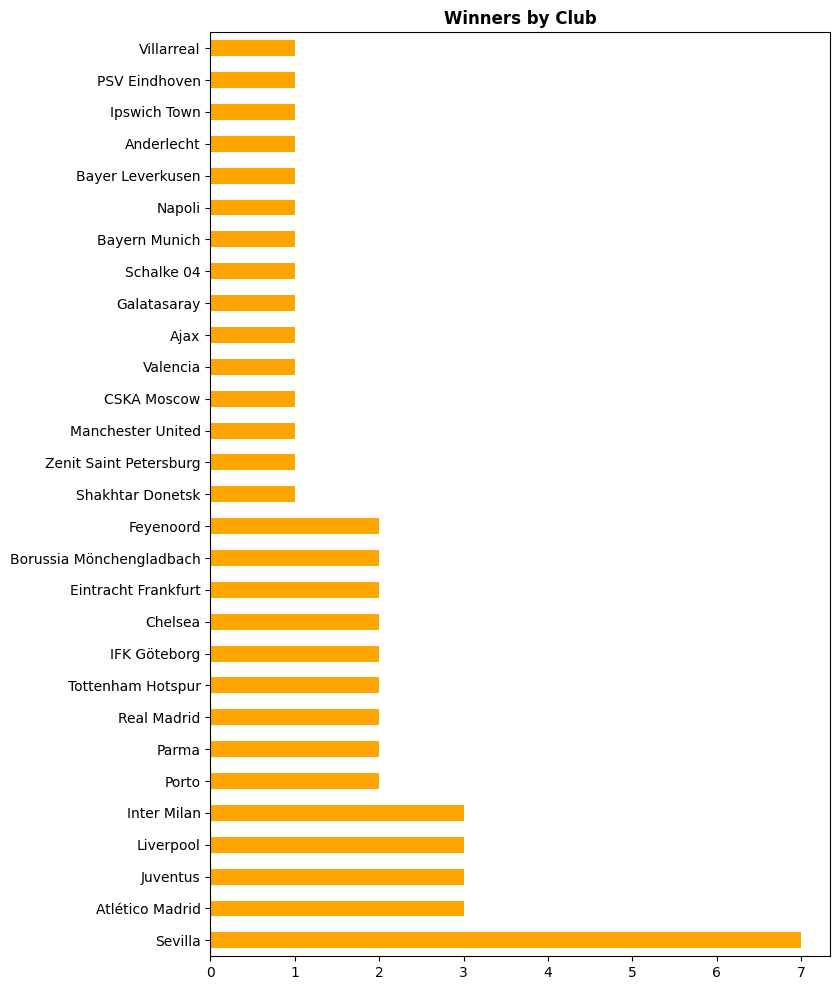

In [8]:
# Displaying number of titles by club:
uel.groupby('Season').first()['Winners'].value_counts().plot(kind = 'barh', color = 'orange', figsize = (8, 12))
plt.ylabel(None)
plt.title('Winners by Club', fontweight = 'bold')
plt.show()

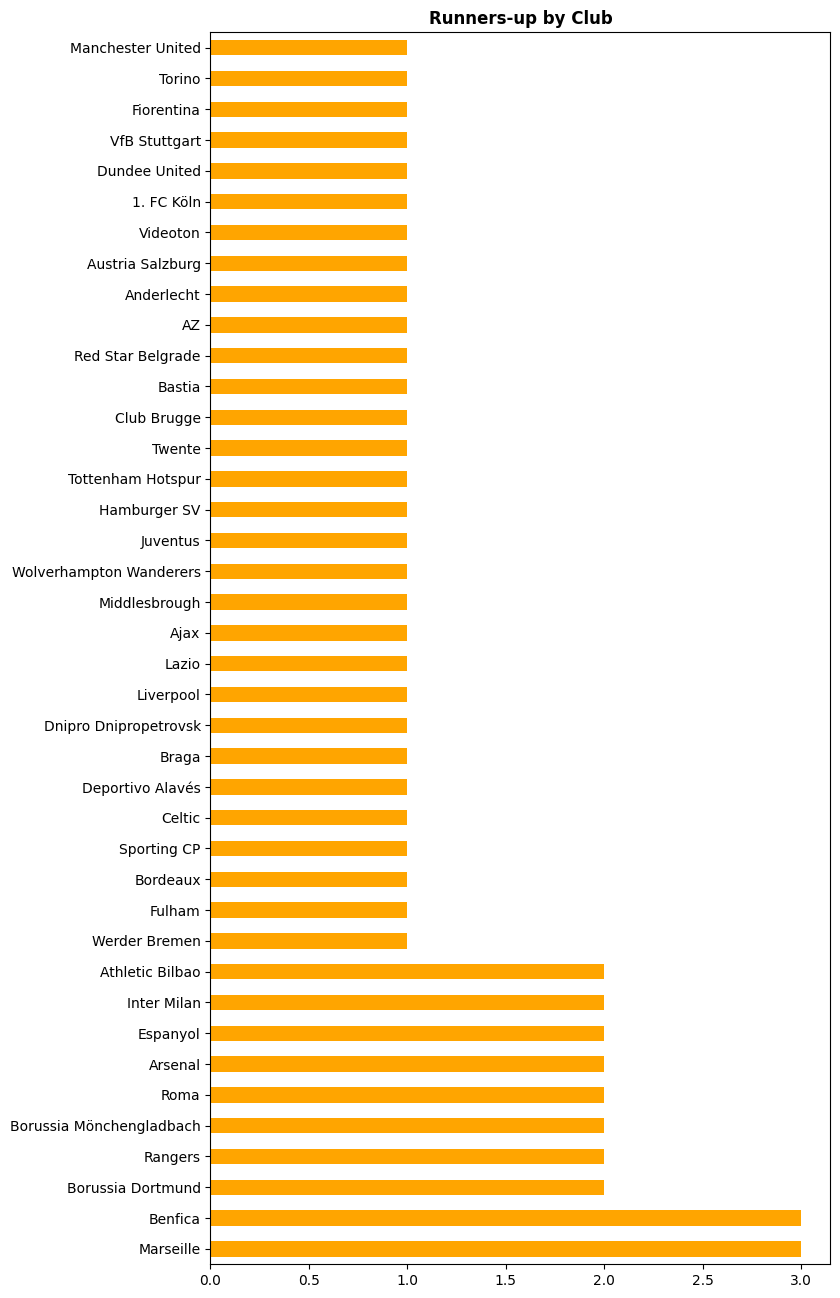

In [9]:
# Displaying number of runners-up by club:
uel.groupby('Season').first()['Runners-up'].value_counts().plot(kind = 'barh', color = 'orange', figsize = (8, 16))
plt.ylabel(None)
plt.title('Runners-up by Club', fontweight = 'bold')
plt.show()

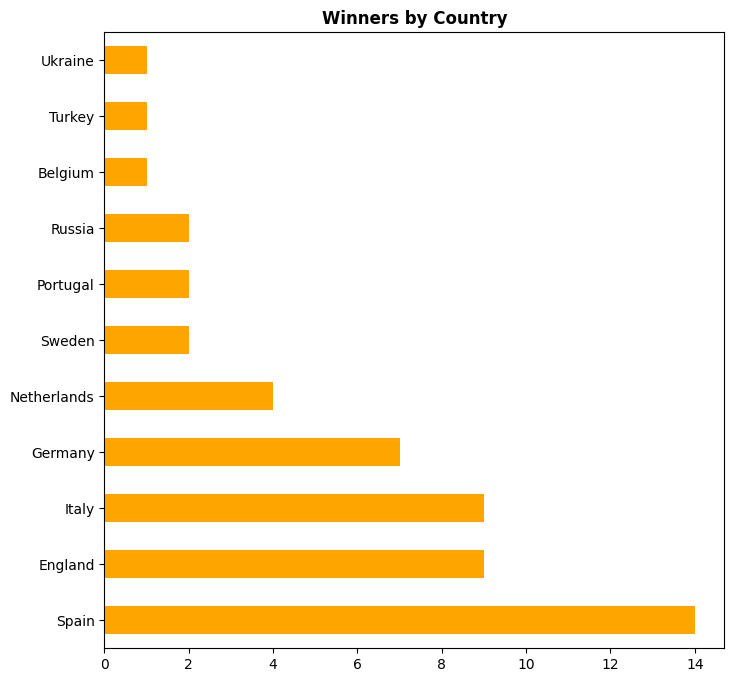

In [10]:
# Displaying number of titles by country:
uel.groupby('Season').first()['Winners country'].value_counts().plot(kind = 'barh', color = 'orange', figsize = (8, 8))
plt.ylabel(None)
plt.title('Winners by Country', fontweight = 'bold')
plt.show()

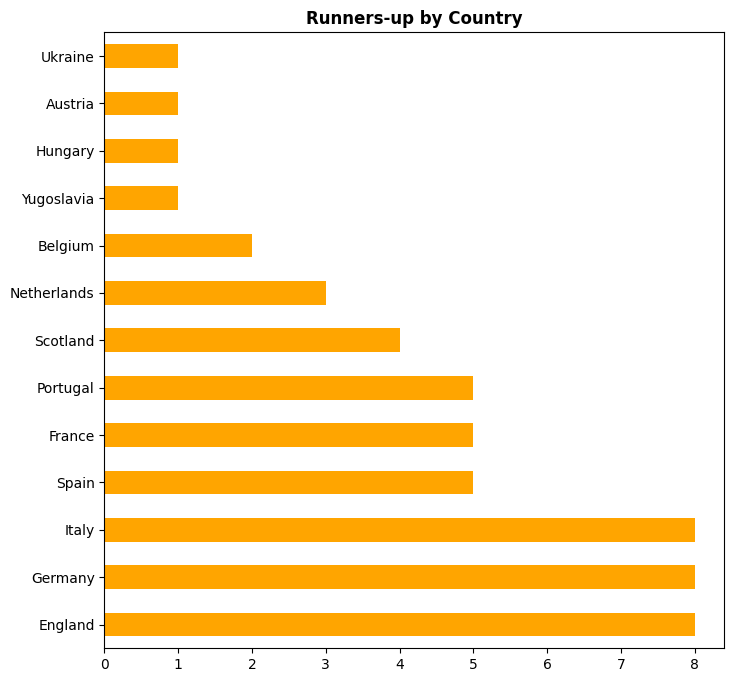

In [11]:
# Displaying number of runners-up by country:
uel.groupby('Season').first()['Runners-up country'].value_counts().plot(kind = 'barh', color = 'orange', figsize = (8, 8))
plt.ylabel(None)
plt.title('Runners-up by Country', fontweight = 'bold')
plt.show()

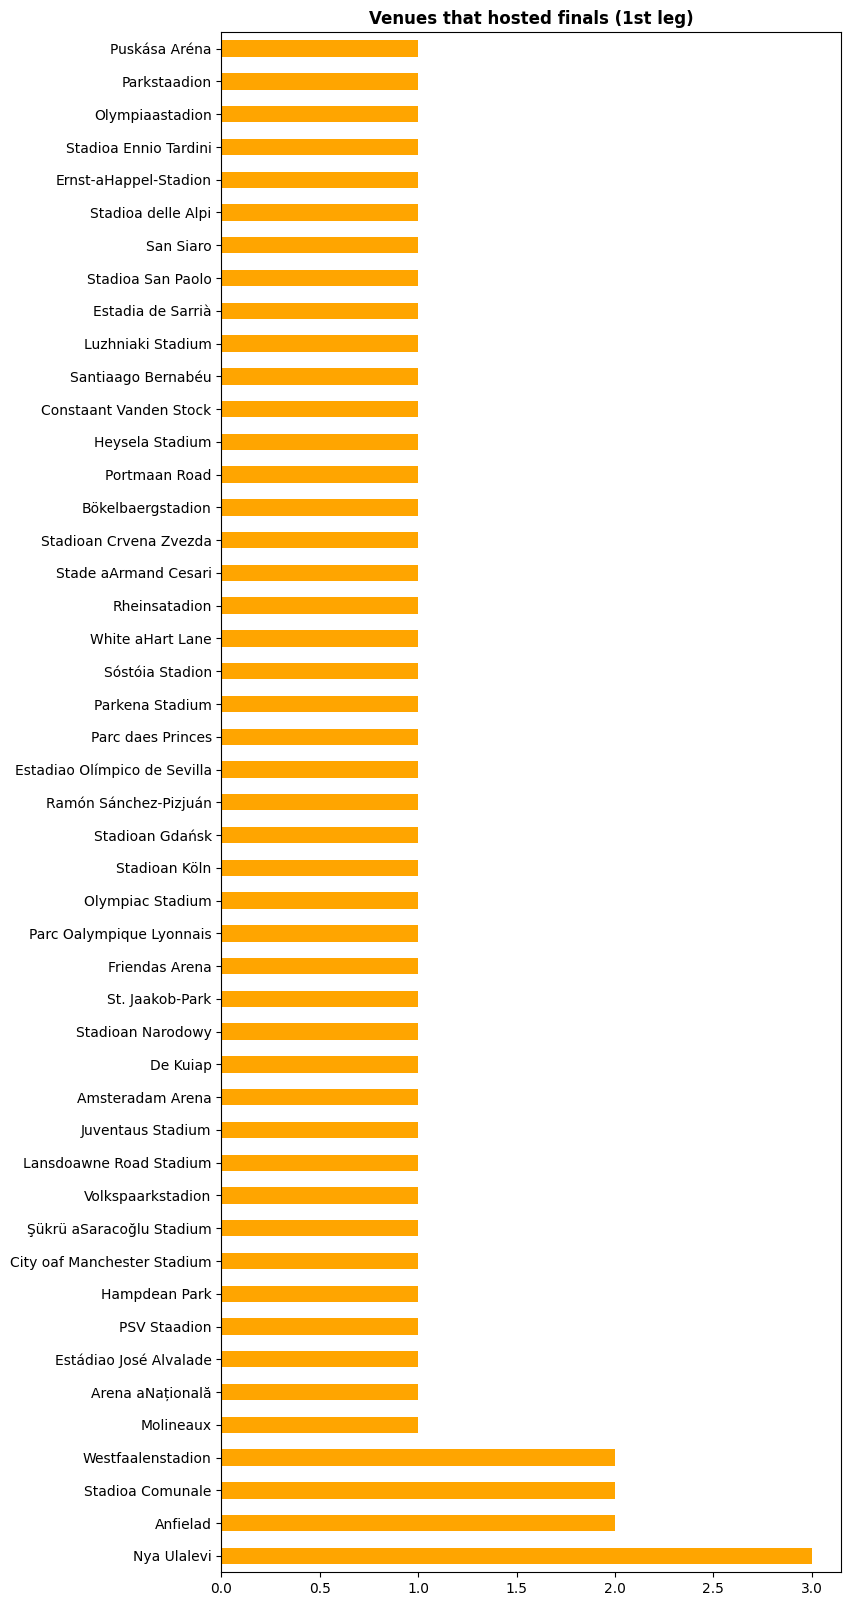

In [12]:
# Displaying distribution of venues that hosted finals (1st leg):
uel.groupby('Season').first()['Venue (1st leg)'].value_counts().plot(kind = 'barh',color = 'orange', figsize = (8, 20))
plt.ylabel(None)
plt.title('Venues that hosted finals (1st leg)', fontweight = 'bold')
plt.show()

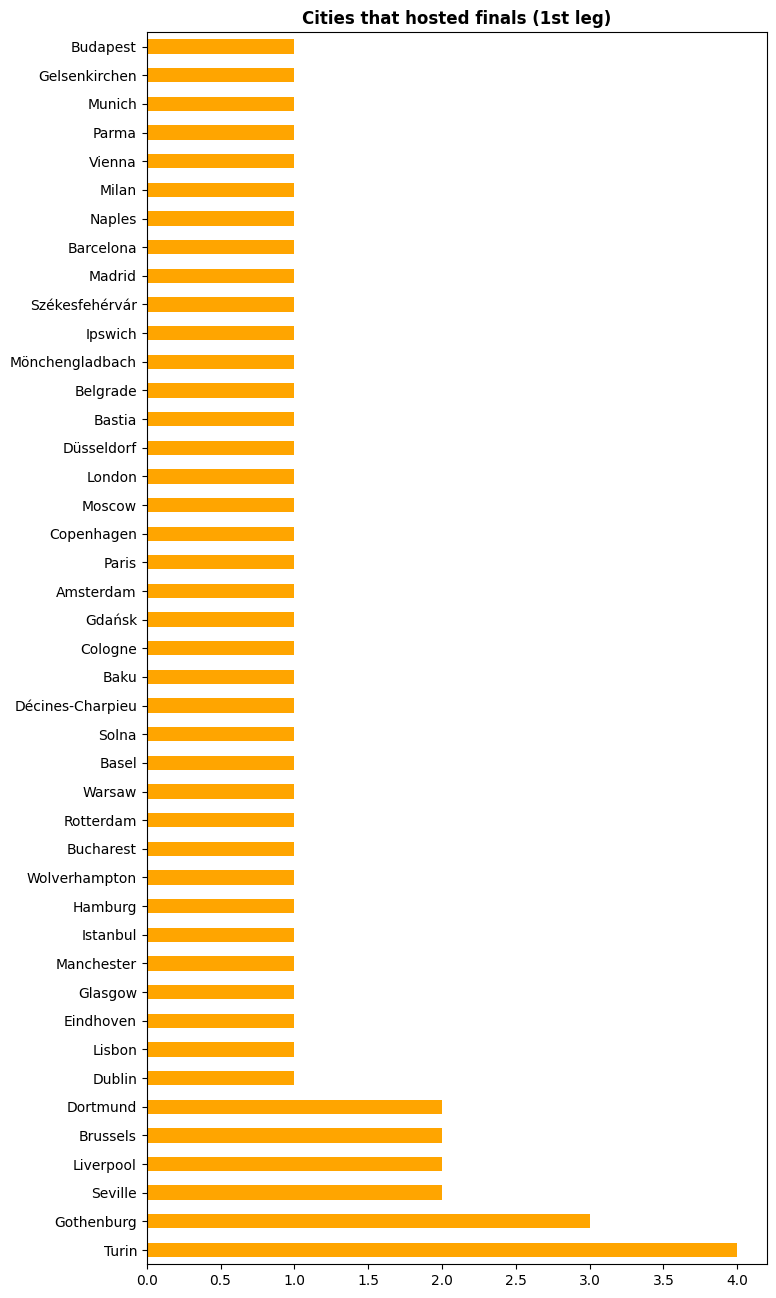

In [13]:
# Displaying distribution of cities that hosted finals (1st leg):
uel.groupby('Season').first()['Host city (1st leg)'].value_counts().plot(kind = 'barh', color = 'orange', figsize = (8, 16))
plt.ylabel(None)
plt.title('Cities that hosted finals (1st leg)', fontweight = 'bold')
plt.show()

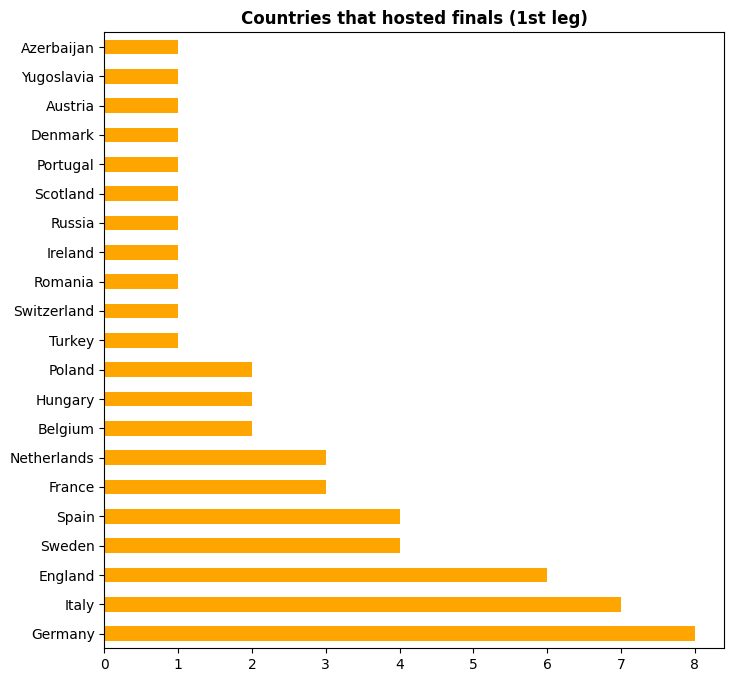

In [14]:
# Displaying distribution of cities that hosted finals (1st leg):
uel.groupby('Season').first()['Host country (1st leg)'].value_counts().plot(kind = 'barh', color = 'orange', figsize = (8, 8))
plt.ylabel(None)
plt.title('Countries that hosted finals (1st leg)', fontweight = 'bold')
plt.show()

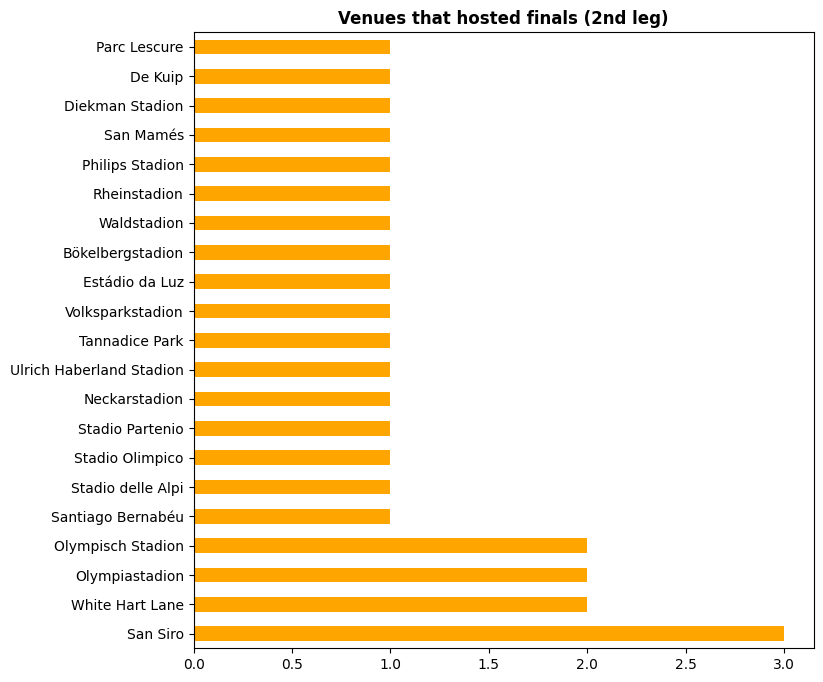

In [16]:
# Displaying distribution of venues that hosted finals (2nd leg):
uel.groupby('Season').first()['Venue (2nd leg)'].value_counts().plot(kind = 'barh', color = 'orange', figsize = (8, 8))
plt.ylabel(None)
plt.title('Venues that hosted finals (2nd leg)', fontweight = 'bold')
plt.show()

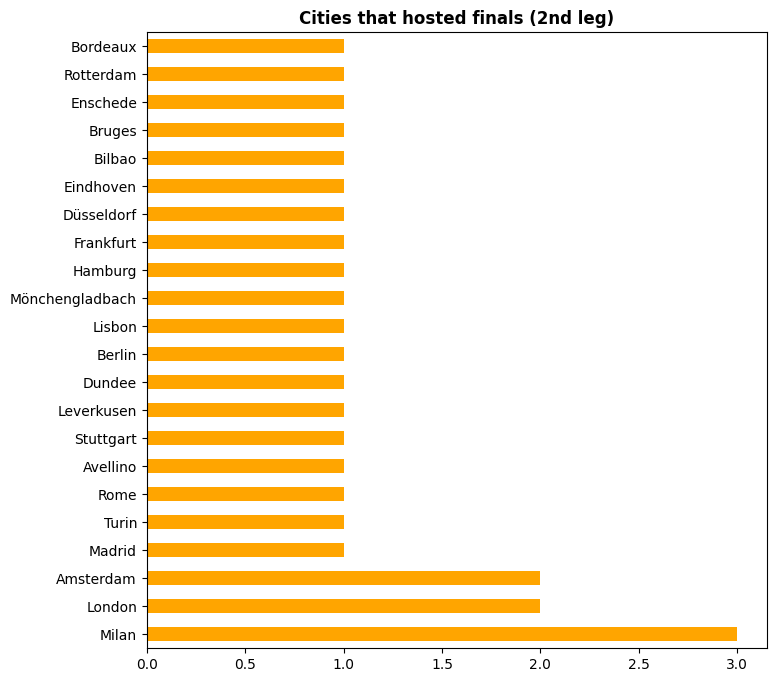

In [19]:
# Displaying distribution of cities that hosted finals (2nd leg):
uel.groupby('Season').first()['Host city (2nd leg)'].value_counts().plot(kind = 'barh', color = 'orange', figsize = (8, 8))
plt.ylabel(None)
plt.title('Cities that hosted finals (2nd leg)', fontweight = 'bold')
plt.show()

In [21]:
# Checking if the club won UEL at home or away:
def champion_at_home(row):
  winners_country = row['Winners country']
  host_country = row['Host country (2nd leg)']
  if winners_country == host_country:
    result = 'Home'
  else:
    result = 'Away'
  return result

# Applying the function above on a column of the dataset and generating a new column as result:
uel['Home champion?'] = uel.apply(champion_at_home, axis=1)
uel.head()

,Season,Winners country,Winners,Score (1st leg),Score (2nd leg),Runners-up,Runners-up country,Venue (1st leg),Host city (1st leg),Host country (1st leg),Venue (2nd leg),Host city (2nd leg),Host country (2nd leg),Attendance (1st leg),Attendance (2nd leg),How the match was won,Finalist who came from UCL,Home champion?
0,1971–72,England,Tottenham Hotspur,2–1,1–1,Wolverhampton Wanderers,England,Molineaux,Wolverhampton,England,White Hart Lane,London,England,45000,54000.0,Regular time,NaN,Home
1,1972–73,England,Liverpool,3–0,0–2,Borussia Mönchengladbach,Germany,Anfielad,Liverpool,England,Bökelbergstadion,Mönchengladbach,Germany,41169,35000.0,Regular time,NaN,Away
2,1973–74,Netherlands,Feyenoord,2–2,2–0,Tottenham Hotspur,England,White aHart Lane,London,England,De Kuip,Rotterdam,Netherlands,46281,59000.0,Regular time,NaN,Home
3,1974–75,Germany,Borussia Mönchengladbach,0–0,5–1,Twente,Netherlands,Rheinsatadion,Düsseldorf,Germany,Diekman Stadion,Enschede,Netherlands,42000,21000.0,Regular time,NaN,Away
4,1975–76,England,Liverpool,3–2,1–1,Club Brugge,Belgium,Anfielad,Liverpool,England,Olympiastadion,Bruges,Belgium,56000,32000.0,Regular time,NaN,Away


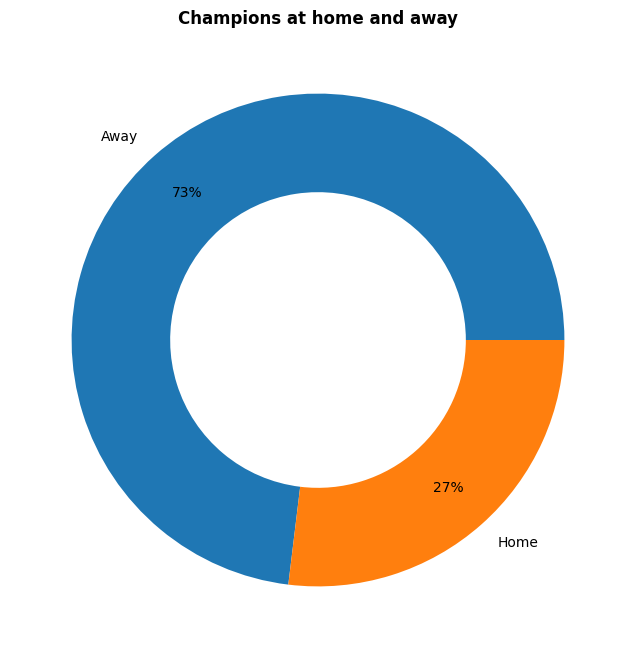

In [23]:
# Displaying the clubs who were champions at home and away:
uel['Home champion?'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Champions at home and away', fontweight = 'bold')
plt.show()

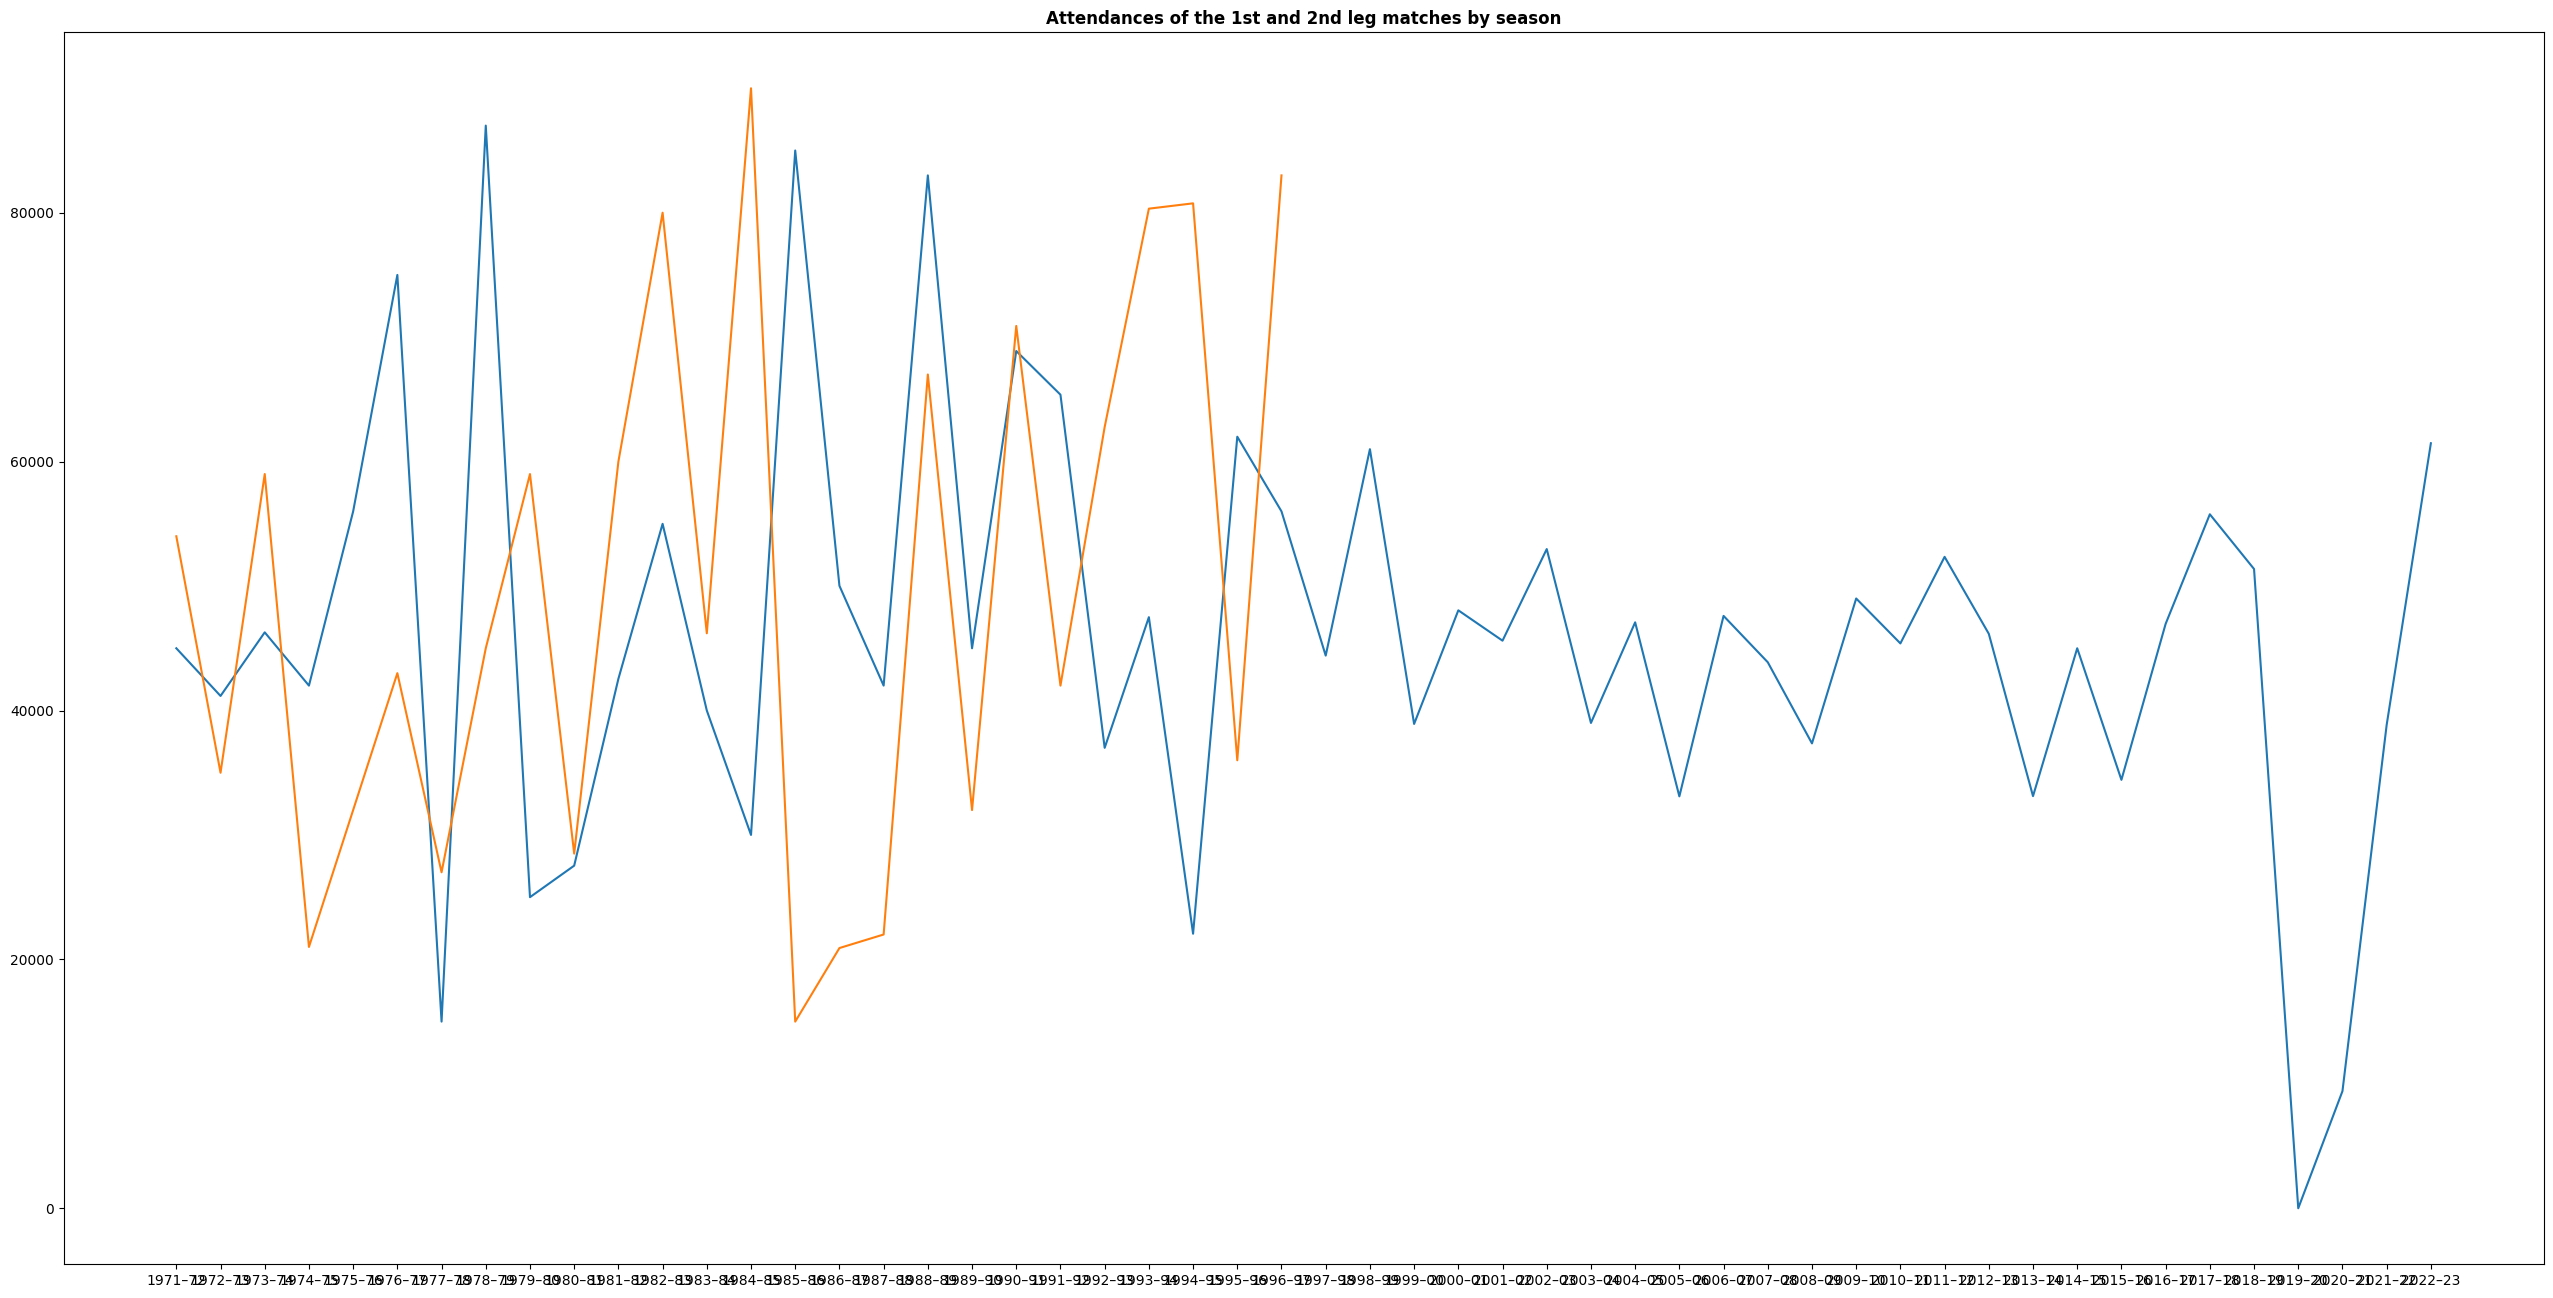

In [28]:
# Displaying the attendances of the 1st and 2nd leg matches by season:
plt.figure(figsize = (32, 16))
plt.title('Attendances of the 1st and 2nd leg matches by season', fontweight = 'bold')
plt.plot(uel['Season'], uel['Attendance (1st leg)'])
plt.plot(uel['Season'], uel['Attendance (2nd leg)'])
plt.show()

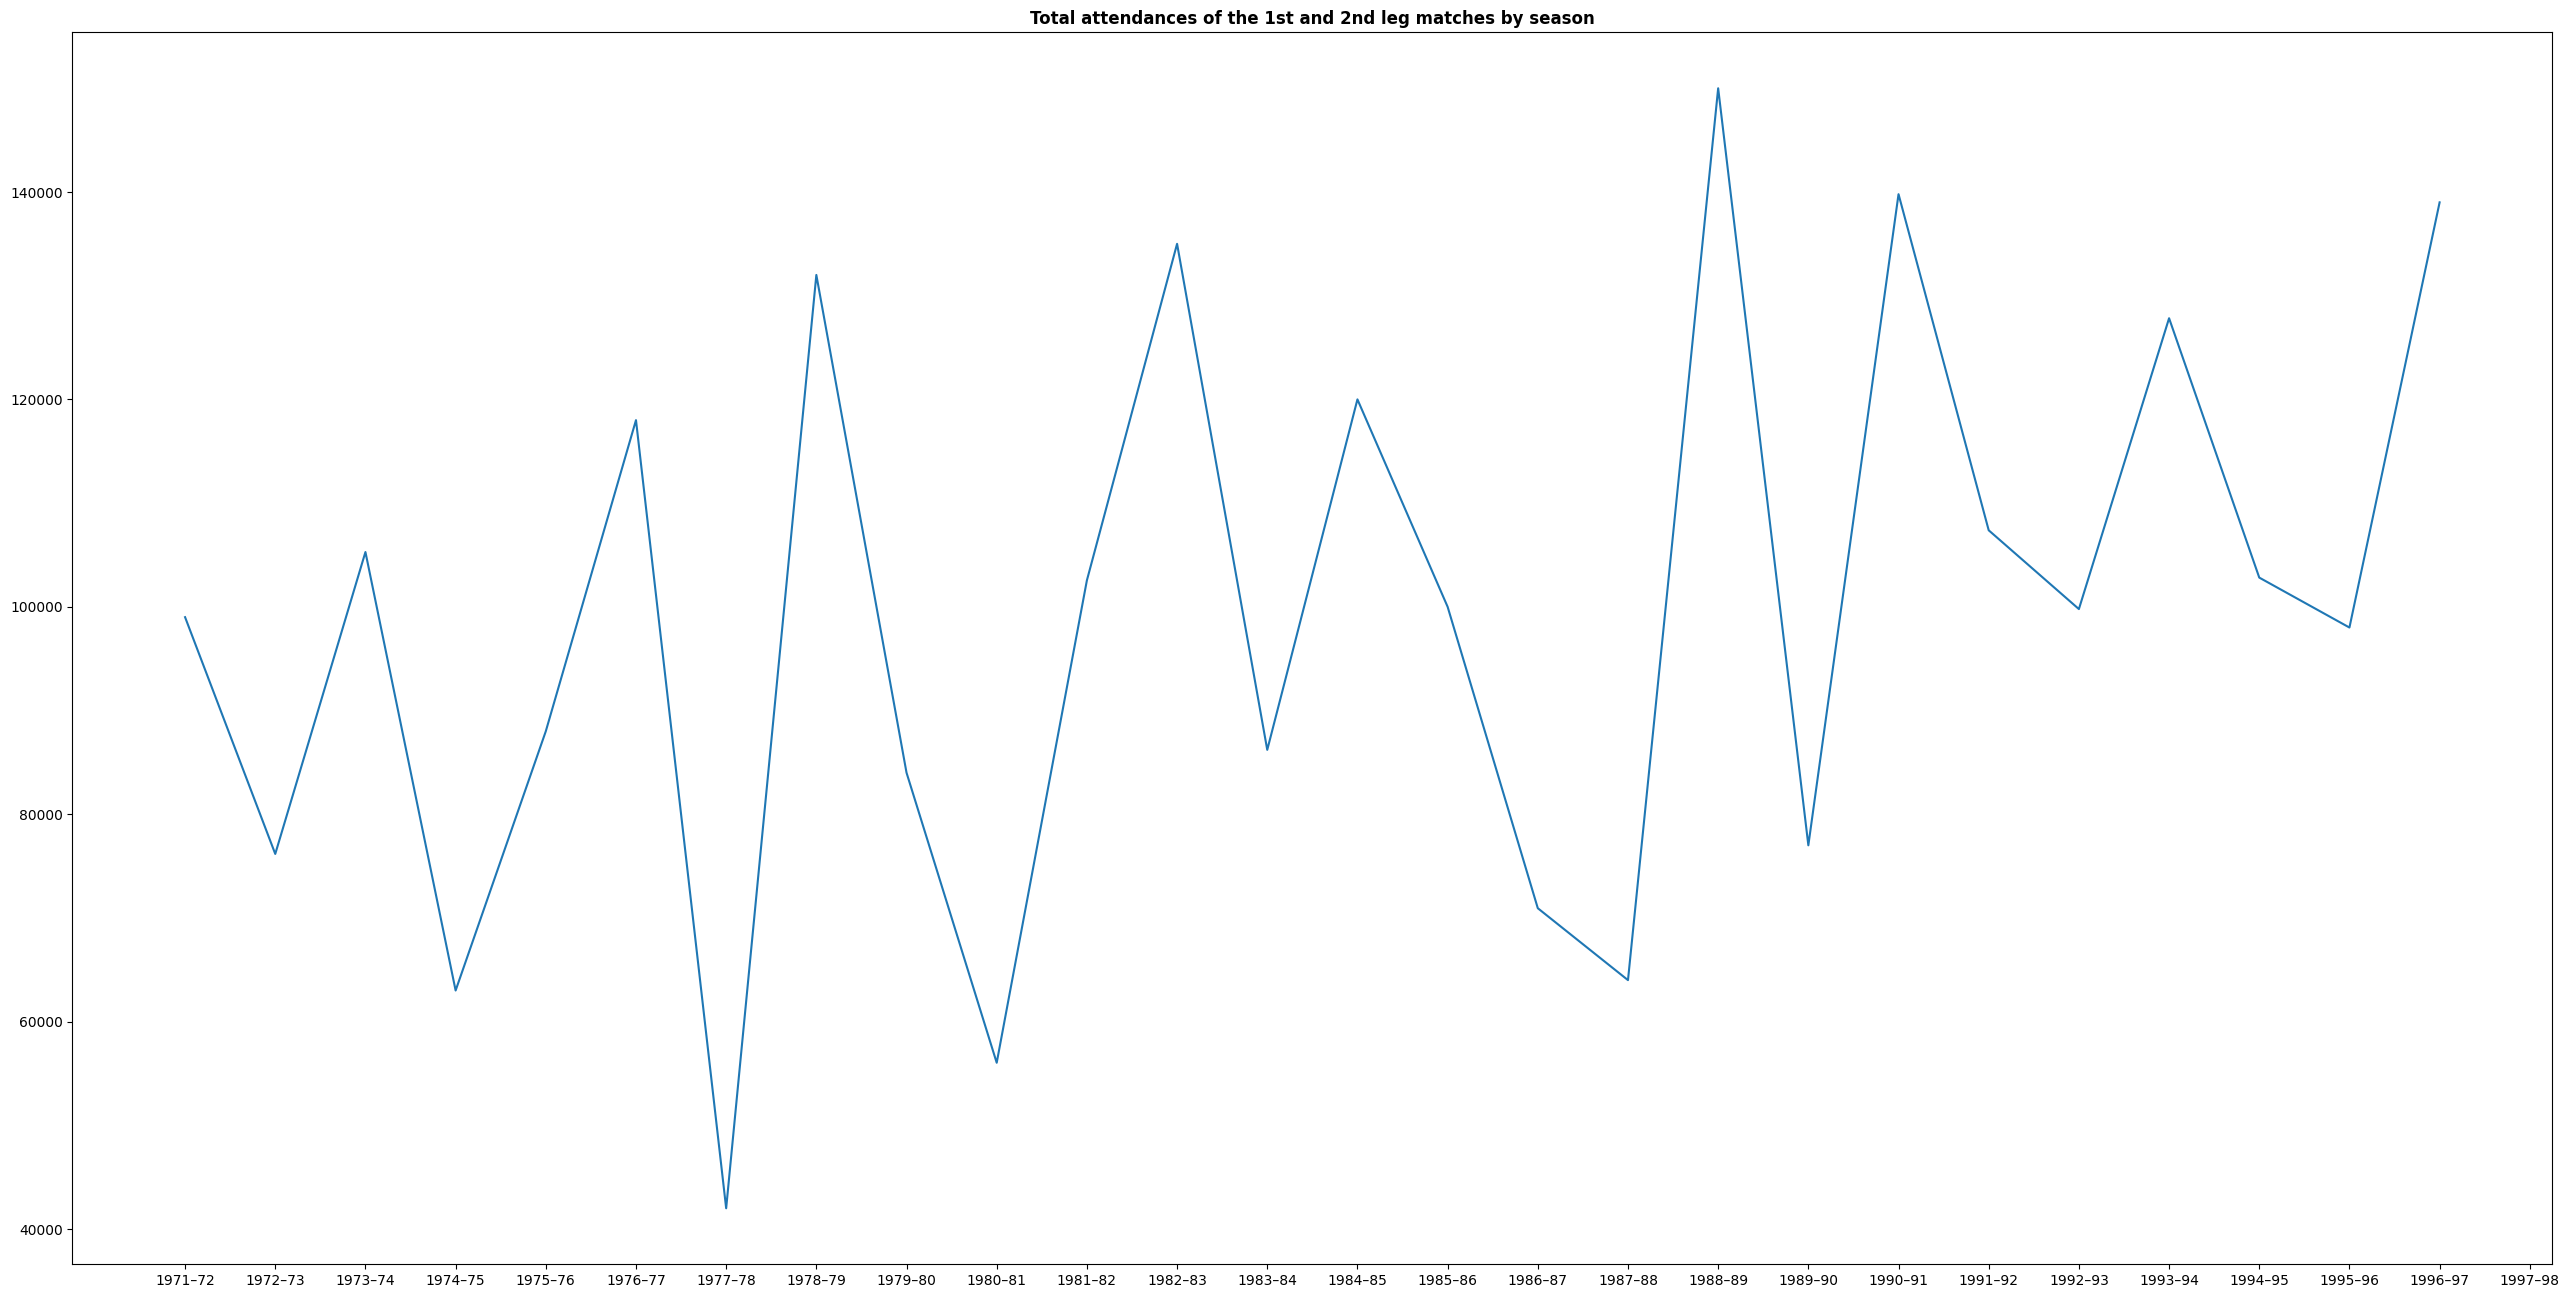

In [29]:
# Displaying the total attendances (1st and 2nd leg matches) by season:
plt.figure(figsize = (32, 16))
plt.title('Total attendances of the 1st and 2nd leg matches by season', fontweight = 'bold')
plt.plot(uel['Season'], uel['Attendance (1st leg)'] + uel['Attendance (2nd leg)'])

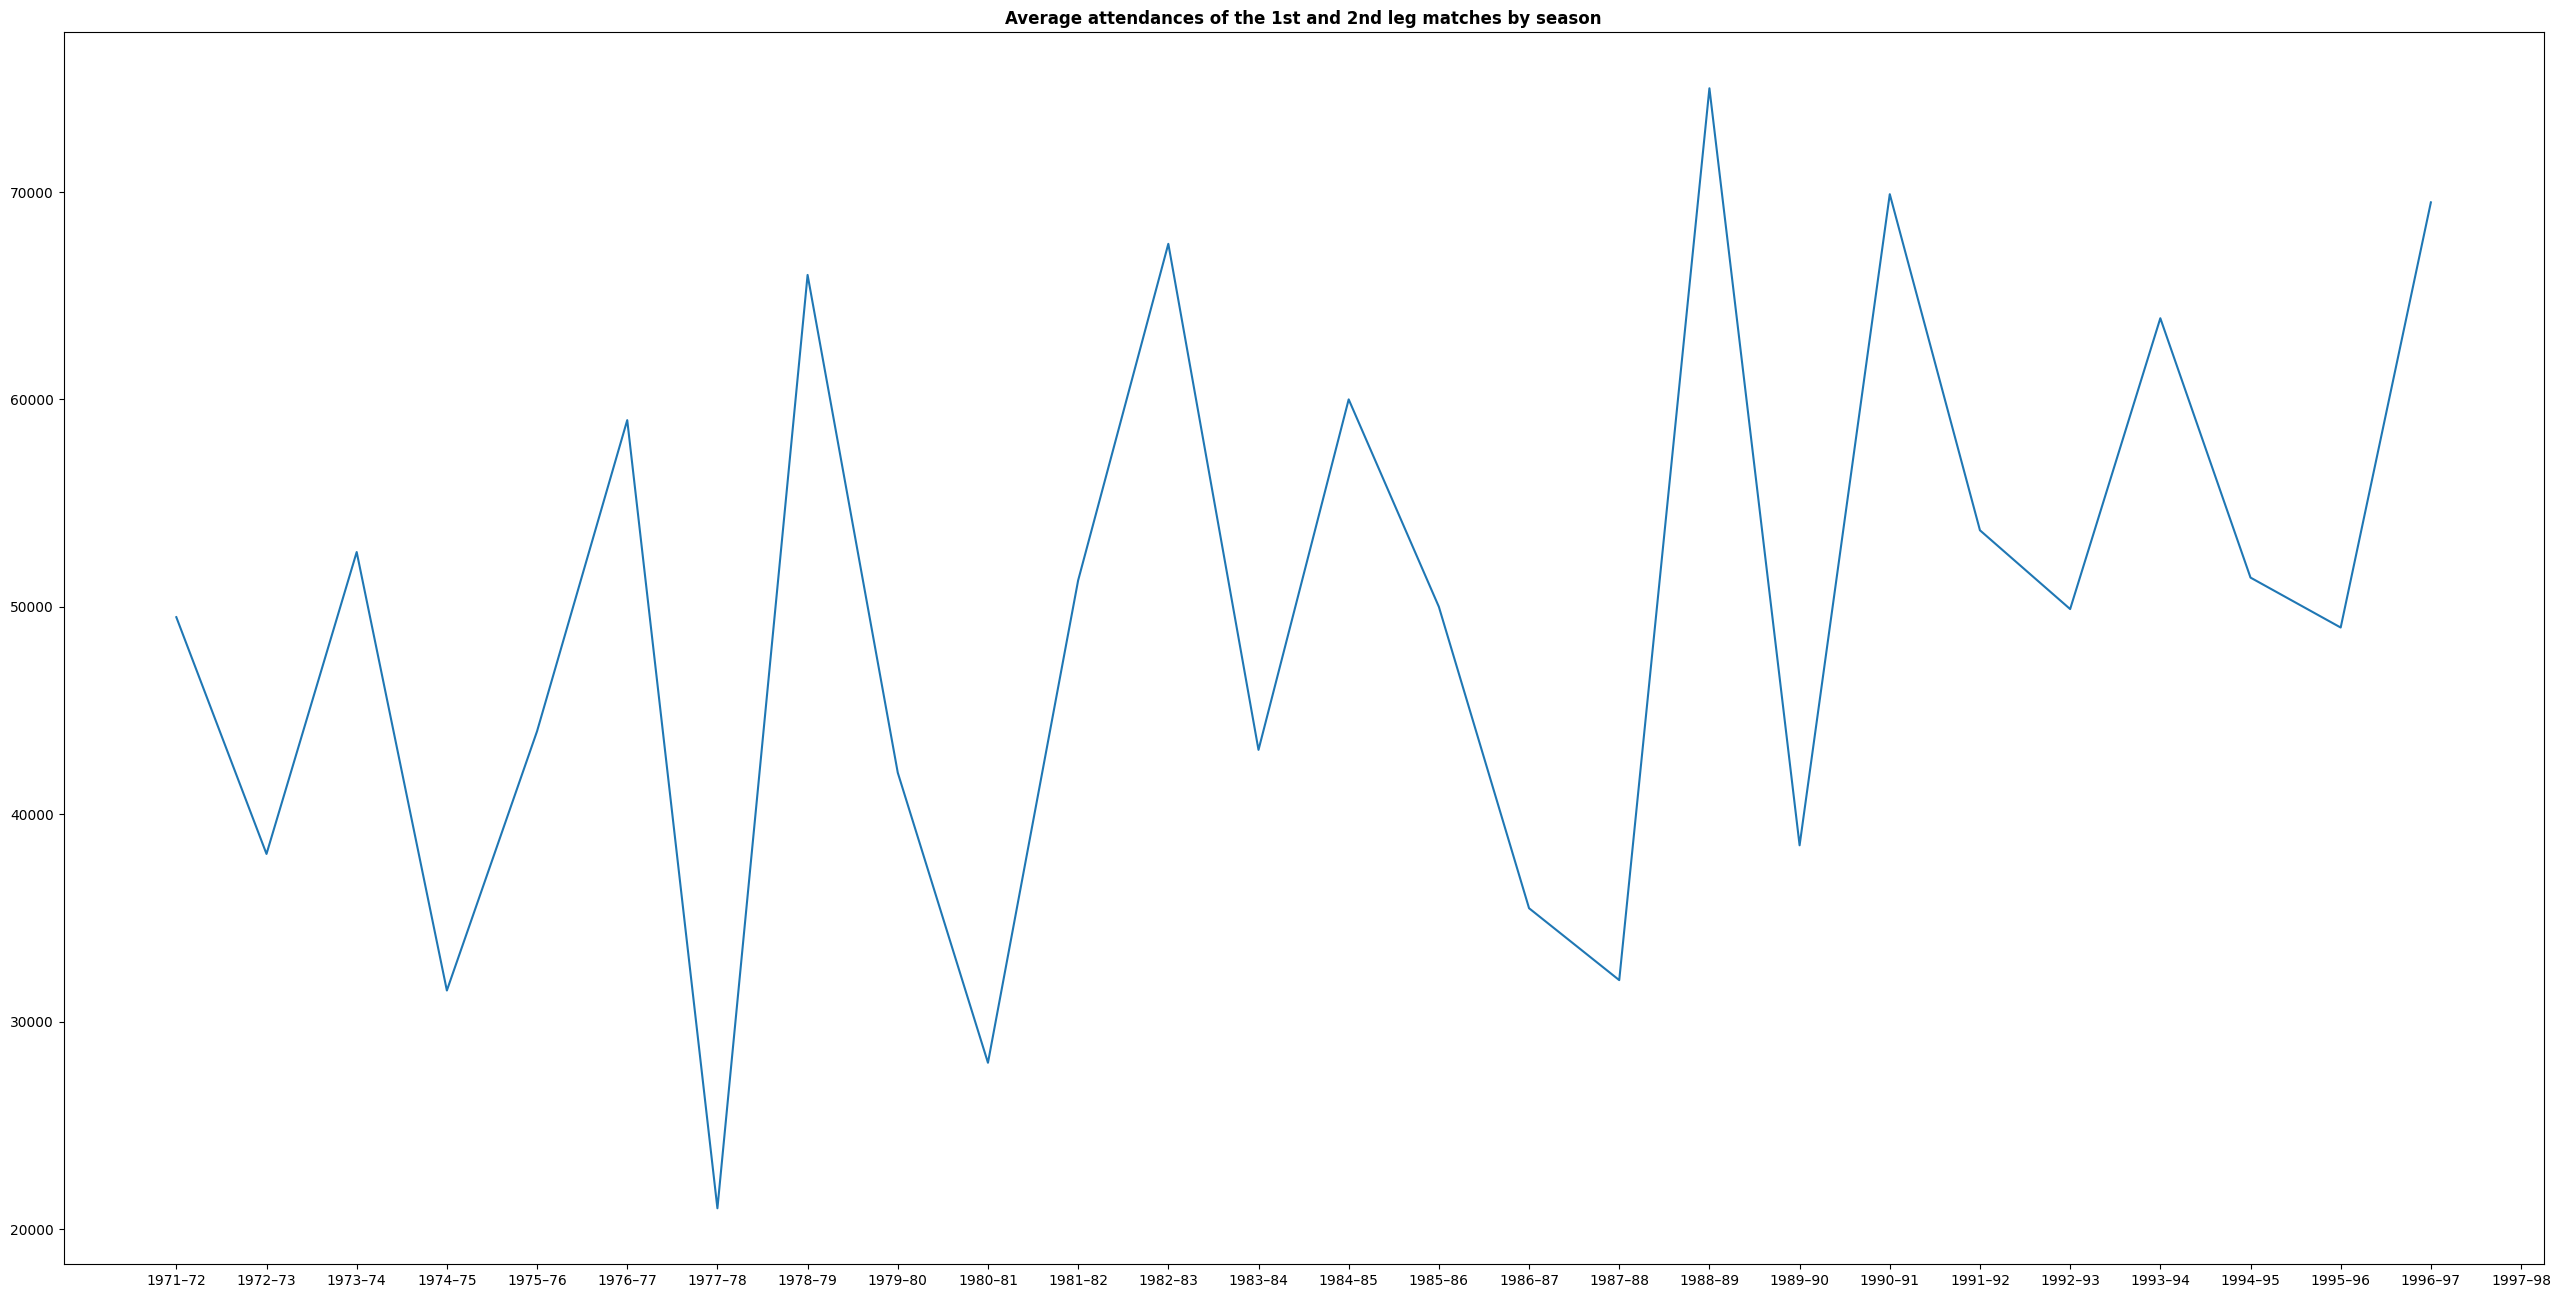

In [30]:
# Displaying the average attendances (1st and 2nd leg matches) by season:
plt.figure(figsize = (32, 16))
plt.title('Average attendances of the 1st and 2nd leg matches by season', fontweight = 'bold')
plt.plot(uel['Season'], (uel['Attendance (1st leg)'] + uel['Attendance (2nd leg)']) / 2)